In [1]:
import tensorflow as tf
import random 
from tensorflow.examples.tutorials.mnist import input_data


In [7]:
tf.set_random_seed(777)

mnist=input_data.read_data_sets('MNIST_data/',one_hot=True) #mnist 데이터 사용

learning_rate=0.001
training_epochs=5
batch_size=100
X=tf.placeholder(tf.float32,[None,784])  #PLACEHOLDER=처음에 값을 지정해주지 않고, 형태만 지정해줬다가 나중에 지정해준다
X_img=tf.reshape(X,[-1,28,28,1])
Y=tf.placeholder(tf.float32,[None,10])
w1=tf.Variable(tf.random_normal([3,3,1,32],stddev=0.01))
L1=tf.nn.conv2d(X_img,w1,strides=[1,1,1,1],padding='SAME')
L1=tf.nn.relu(L1)
L1=tf.nn.max_pool(L1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

w2=tf.Variable(tf.random_normal([3,3,32,64],stddev=0.01))
L2=tf.nn.conv2d(L1,w2,strides=[1,1,1,1],padding='SAME')
L2=tf.nn.relu(L2)
L2=tf.nn.max_pool(L2,ksize=[1,2,2,1], strides=[1,2,2,1],padding='SAME')
L2_flat=tf.reshape(L2,[-1,7*7*64])

w3=tf.get_variable('w3',shape=[7*7*64,10],
                  initializer=tf.contrib.layers.xavier_initializer())
b=tf.Variable(tf.random_normal([10]))



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
logits=tf.matmul(L2_flat,w3)+b
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost=0
    total_batch=int(mnist.train.num_examples/batch_size)
    
    for i in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        feed_dict={X:batch_xs,Y:batch_ys}
        c,_=sess.run([cost,optimizer],feed_dict=feed_dict)
        avg_cost+=c/total_batch
    print('Epoch:','%04d'%(epoch+1),'cost=','{:.9f}'.format(avg_cost))

Epoch: 0001 cost= 0.374285203
Epoch: 0002 cost= 0.101149790
Epoch: 0003 cost= 0.073429028
Epoch: 0004 cost= 0.059480770
Epoch: 0005 cost= 0.048987650


In [11]:
correct_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print('accuracy',sess.run(accuracy,feed_dict={X:mnist.test.images,Y:mnist.test.labels}))

r=random.randint(0,mnist.test.num_examples-1)
print('Label:',sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print('Prediction:',sess.run(tf.argmax(logits,1),feed_dict={X:mnist.test.images[r:r+1]}))
sess.close()

accuracy 0.9832
Label: [4]
Prediction: [4]


# api

In [44]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

X=tf.placeholder(tf.float32,[None,28,28,1])
Y=tf.placeholder(tf.float32,[None,10])
is_training=tf.placeholder(tf.bool)

L1=tf.layers.conv2d(X,32,[3,3],activation=tf.nn.relu)
L1=tf.layers.max_pooling2d(L1,[2,2],[2,2])
L1=tf.layers.dropout(L1,0.7,is_training)

L2=tf.layers.conv2d(L1,64,[3,3],activation=tf.nn.relu)
L2=tf.layers.max_pooling2d(L1,[2,2],[2,2])
L2=tf.layers.dropout(L2,0.7,is_training)

L3=tf.contrib.layers.flatten(L2)
L3=tf.layers.dense(L3,256,activation=tf.nn.relu)
L3=tf.layers.dropout(L3,0.5,is_training)

model=tf.layers.dense(L3,10,activation=None)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=Y))
optimizer=tf.train.AdamOptimizer(0.001).minimize(cost)

In [48]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

batch_size=100
total_batch=int(mnist.train.num_examples/batch_size)

for epoch in range(15):
    total_cost=0
    
    for i in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        batch_xs=batch_xs.reshape(-1,28,28,1)
        _, cost_val = sess.run([optimizer, cost],feed_dict={X: batch_xs,Y: batch_ys,is_training: True})
        #_, cost_val=sess.run([optimizer,cost],feed_dict={X:batch_xs,
         #                                             Y:batch_ys,
          #                                            is_training:True})
        total_cost+=cost_val
        
    print('epoch:','%04d'%(epoch+1),'avg.cost=','{:.4f}'.format(total_cost/total_batch))

epoch: 0001 avg.cost= 0.1842
epoch: 0002 avg.cost= 0.0513
epoch: 0003 avg.cost= 0.0339
epoch: 0004 avg.cost= 0.0261
epoch: 0005 avg.cost= 0.0185
epoch: 0006 avg.cost= 0.0149
epoch: 0007 avg.cost= 0.0120
epoch: 0008 avg.cost= 0.0108
epoch: 0009 avg.cost= 0.0068
epoch: 0010 avg.cost= 0.0079
epoch: 0011 avg.cost= 0.0067
epoch: 0012 avg.cost= 0.0063
epoch: 0013 avg.cost= 0.0054
epoch: 0014 avg.cost= 0.0035
epoch: 0015 avg.cost= 0.0031


In [50]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
feed_dict={X:
mnist.test.images.reshape(-1, 28, 28, 1),
Y: mnist.test.labels,
is_training: False}))

정확도: 0.9917


In [56]:
tf.argmax([1,2,3,100,0,2,2],0)

<tf.Tensor 'ArgMax_14:0' shape=() dtype=int64>

In [57]:
mnist.train.num_examples

55000

In [58]:
from keras import layers,models

Using TensorFlow backend.


# 합성곱 신경망


In [ ]:
https://github.com/gilbutITbook/006975/blob/master/5.1-introduction-to-convnets.ipynb

In [59]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [65]:

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [66]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 17s 284us/step - loss: 0.1653 - acc: 0.9481
Epoch 2/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.0480 - acc: 0.9849
Epoch 3/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.0328 - acc: 0.9898
Epoch 4/5
60000/60000 [==============================] - 7s 115us/step - loss: 0.0245 - acc: 0.9927
Epoch 5/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.0203 - acc: 0.9936


In [67]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


10000/10000 [==============================] - 1s 115us/step


In [68]:
test_acc


0.9907

# 소규모 데이터셋에서 컨브넷 사용하기

In [69]:
import os, shutil


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

# dog and cat

In [2]:
import os,shutil

### 데이터 분류작업

In [3]:
original_dataset_dir='C:\\dogncat\\original\\train\\train'
base_dir='C:\\dogncat\\copy'

if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)


train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [5]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [7]:
# 모든 이미지를 1/255로 스케일을 조정합니다
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:

for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [9]:

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 10s 99ms/step - loss: 0.6874 - acc: 0.5345 - val_loss: 0.6799 - val_acc: 0.5580
Epoch 2/30
100/100 [==============================] - 6s 59ms/step - loss: 0.6586 - acc: 0.5935 - val_loss: 0.6338 - val_acc: 0.6440
Epoch 3/30
100/100 [==============================] - 6s 62ms/step - loss: 0.6092 - acc: 0.6725 - val_loss: 0.6110 - val_acc: 0.6530
Epoch 4/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5631 - acc: 0.7040 - val_loss: 0.5984 - val_acc: 0.6710
Epoch 5/30
100/100 [==============================] - 6s 65ms/step - loss: 0.5417 - acc: 0.7235 - val_loss: 0.5993 - val_acc: 0.6600
Epoch 6/30
100/100 [==============================] - 7s 69ms/step - loss: 0.5138 - acc: 0.7330 - val_loss: 0.5870 - val_acc: 0.6800
Epoch 7/30
100/100 [==============================] - 8s 75ms/step - loss: 0.4937 - acc: 0.7550 - val_loss: 0.5950 - val_acc: 0.6770
Epoch 8/30
100/100 [

In [11]:
model.save('cats_and_dogs_small_1.h5')


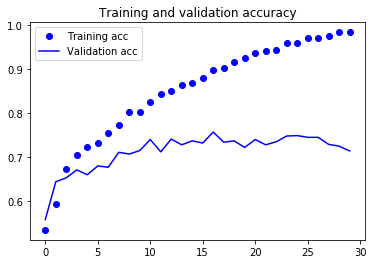

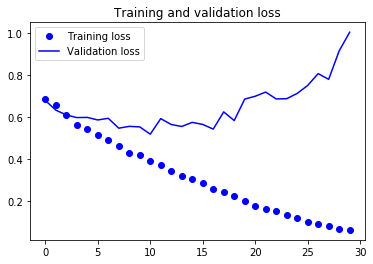

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

트레인 스코어는 계속해서 증가하지만 벨리데이션 스코어는 변곡점에서 증가하지않는다.

나중에는 떨어지는 모습이다.

이건 오버피팅이 일어나기 떄문인데 저부분까지만 학습하던가

데이터를 더 넣어 줘야한다.

### DATAGENERATOR 로 이미지를 증식해준다.

In [17]:



datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

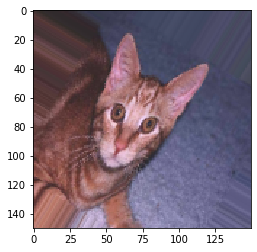

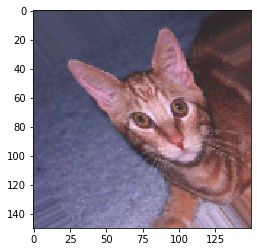

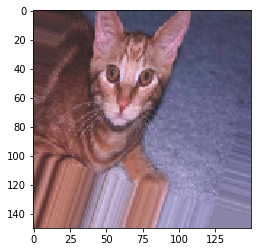

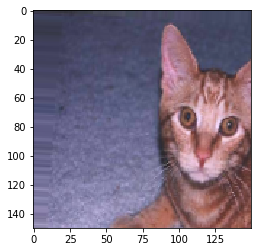

In [103]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[10]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)


# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1):  #배치사이즈2로 하면 
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

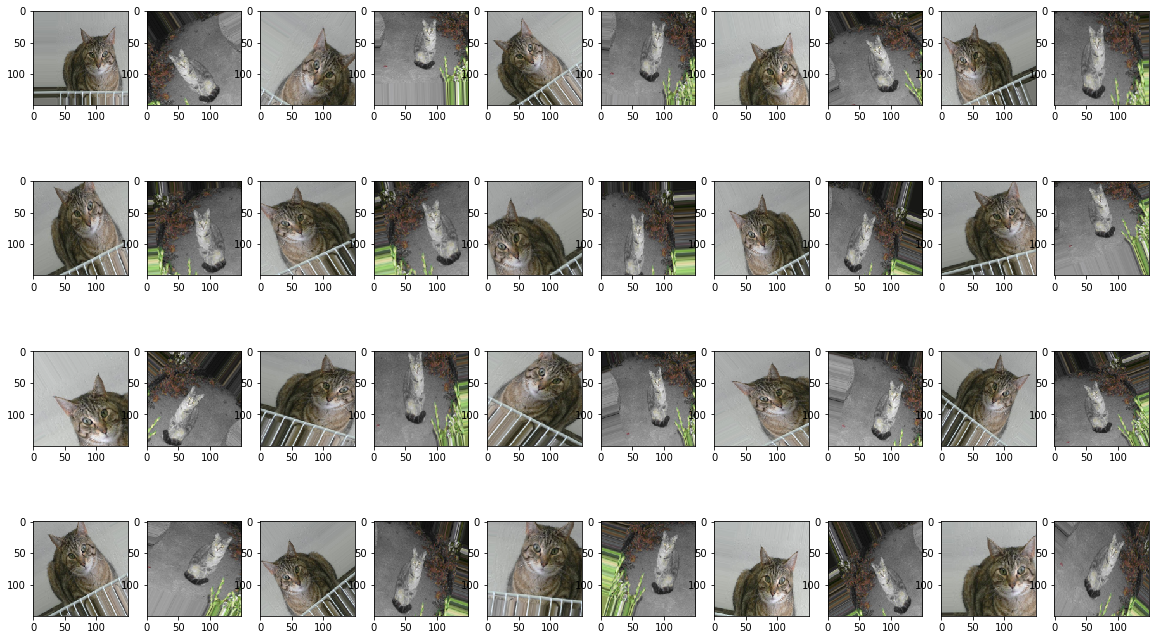

In [39]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image
import numpy as np
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[1:20]
y=[]
# 이미지를 읽고 크기를 변경합니다

for i in range(len(img_path)):
    img=image.load_img(img_path[i],target_size=(150, 150))
    x=image.img_to_array(img)
    y.append(x)
y=np.array(y)

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다



# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)


# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
plt.figure(figsize=[20,12])
for batch in datagen.flow(y, batch_size=10,shuffle=False):
    plt.subplot(4,10,i+1)    
    imgplot = plt.imshow(image.array_to_img(batch[5]))
    i += 1
    if i % 40 == 0:
        break



In [95]:

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 6s 64ms/step - loss: 0.0425 - acc: 0.9855 - val_loss: 1.0800 - val_acc: 0.7100
Epoch 2/30
100/100 [==============================] - 6s 63ms/step - loss: 0.0296 - acc: 0.9935 - val_loss: 1.1622 - val_acc: 0.7210
Epoch 3/30
100/100 [==============================] - 7s 66ms/step - loss: 0.0342 - acc: 0.9895 - val_loss: 1.1700 - val_acc: 0.7240
Epoch 4/30
100/100 [==============================] - 7s 68ms/step - loss: 0.0219 - acc: 0.9945 - val_loss: 1.2956 - val_acc: 0.7110
Epoch 5/30
100/100 [==============================] - 7s 70ms/step - loss: 0.0257 - acc: 0.9915 - val_loss: 1.2592 - val_acc: 0.7170
Epoch 6/30
100/100 [==============================] - 7s 72ms/step - loss: 0.0173 - acc: 0.9970 - val_loss: 1.3466 - val_acc: 0.7070
Epoch 7/30
100/100 [==============================] - 8s 76ms/step - loss: 0.0332 - acc: 0.9905 - val_loss: 1.4653 - val_acc: 0.7160
Epoch 8/30
100/100 [==============================] - 8s 84ms/step - 

In [96]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [98]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
# 각각의 파라미터는 회전각도,횡이동, 수직이동, 전단변형, 확대축소


# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 30s 302ms/step - loss: 0.6919 - acc: 0.5256 - val_loss: 0.6859 - val_acc: 0.5095
Epoch 2/100
100/100 [==============================] - 32s 324ms/step - loss: 0.6787 - acc: 0.5575 - val_loss: 0.6494 - val_acc: 0.6076
Epoch 3/100
100/100 [==============================] - 39s 388ms/step - loss: 0.6644 - acc: 0.5841 - val_loss: 0.6560 - val_acc: 0.5984
Epoch 4/100
100/100 [==============================] - 43s 426ms/step - loss: 0.6456 - acc: 0.6128 - val_loss: 0.6685 - val_acc: 0.5825
Epoch 5/100
100/100 [==============================] - 45s 452ms/step - loss: 0.6298 - acc: 0.6434 - val_loss: 0.6164 - val_acc: 0.6567
Epoch 6/100
100/100 [==============================] - 39s 389ms/step - loss: 0.6200 - acc: 0.6500 - val_loss: 0.6025 - val_acc: 0.6546
Epoch 7/100
100/100 [==============================] - 38s 376ms/step - loss: 0.6038 - acc: 0.6628 -

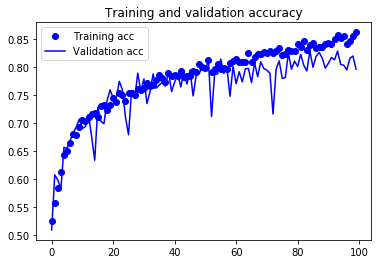

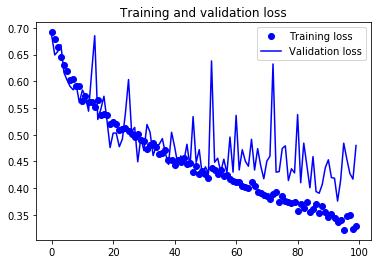

In [105]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

데이터 증식후 그래프가 훨씬 좋은 모양을 보였다. 

에포크가 진행되면서 스코어가 점점 향상되고 트레인 데이터와 비슷한 양상을 보인다.

정확도도 85퍼 이상까지 올라갔다.

처음데이터는 데이터 수의 문제가 있었던거같다.

데이터 부족,불균형 문제를 해결하기 위한 방법으로 smote 방법 등이 있다.

https://datascienceschool.net/view-notebook/c1a8dad913f74811ae8eef5d3bedc0c3/

https://mkjjo.github.io/python/2019/01/04/smote_duplicate.html
